# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
archive_enhanced.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep="\t")
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_list = []
keys = ['id', 'id_str', 'source', 'nb_favs', 'nb_retweets']
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    # keys = json.loads(lines[0])
    for line in lines:
        line = json.loads(line)
        df_list.append({'id': line['id'],
                        'id_str': line['id_str'],
                        'source': line['source'],
                        'nb_favs': line['favorite_count'],
                        'nb_retweets': line['retweet_count']
                       })
        
df_more_info = pd.DataFrame(df_list, columns=keys)

In [7]:
df_more_info.head()

,id,id_str,source,nb_favs,nb_retweets
0,892420643555336193,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",39467,8853
1,892177421306343426,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",33819,6514
2,891815181378084864,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",25461,4328
3,891689557279858688,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",42908,8964
4,891327558926688256,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
df_more_info

,id,id_str,source,nb_favs,nb_retweets
0,892420643555336193,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",39467,8853
1,892177421306343426,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",33819,6514
2,891815181378084864,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",25461,4328
3,891689557279858688,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",42908,8964
4,891327558926688256,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",41048,9774
5,891087950875897856,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",20562,3261
6,890971913173991426,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",12041,2158
7,890729181411237888,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",56848,16716
8,890609185150312448,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",28226,4429
9,890240255349198849,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",32467,7711


In [11]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Puisque que nous n'avons pas besoin des retweets et des replies, nous allons les supprimer et conserver uniquement les autres.

In [12]:
archive_enhanced = archive_enhanced[archive_enhanced.retweeted_status_id.isna()]
archive_enhanced = archive_enhanced[archive_enhanced.in_reply_to_status_id.isna()]
archive_enhanced.index = range(len(archive_enhanced))
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [13]:
# les chiens n'ayant pas de stade, c'est-à-dire doggo, floofer, pupper et puppo tous None

not_stade = archive_enhanced.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"')
len(not_stade)

1761

In [14]:
# on recherche s'il y aurait des chiens sans stade mais dont on peut trouver le stade dans le texte
wrongly_not_stade_index = []
for index_text in zip(not_stade.index.values, not_stade.text.values):
    try:
        ind, text = index_text
        assert all([step not in text for step in ['doggo', 'floofer', 'floof', 'pupper', 'puppo']])
    except:
        if sum([step in text for step in ['doggo', 'floofer', 'floof', 'pupper', 'puppo']]) == 1:
            wrongly_not_stade_index.append(ind)
print(len(wrongly_not_stade_index))

55


Il y en a **55** !

Les voici :

In [15]:
wrongly_not_stade = archive_enhanced.iloc[wrongly_not_stade_index, :]
wrongly_not_stade.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
24,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
49,881906580714921986,NaN,NaN,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,None,None,None,None
50,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
73,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
75,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None


In [16]:
ind = 2
print(wrongly_not_stade.iloc[ind, 5])

This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s


Le jeu de mots contenu dans cette phrase (*puppertunity*) n'a malheureusement pas été détecté comme le stade du chien.

Essayons de voir s'il y a des notes qui ont été mal attribuées :

In [17]:
l = []
for z in zip(archive_enhanced.index.values, archive_enhanced.text.values, archive_enhanced.rating_numerator.values, archive_enhanced.rating_denominator.values):
    try:
        ind, text, num, denom = z
        assert f"{num}/{denom}" in text
    except:
        l.append(ind)
print(len(l))

0


Il n'y en a pas.

In [18]:
sum(archive_enhanced.duplicated())

0

In [19]:
sum(df_more_info.duplicated())

0

In [20]:
sum(image_predictions.duplicated())

0

In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


On veut savoir s'il y a aurait des prédictions pour lesquelles *p2 > p1* ou *p3 > p2* ou *p3 > p1*, ce qui serait incorrect :

In [22]:
l = []
for z in zip(image_predictions.index.values, image_predictions.p1_conf.values, image_predictions.p2_conf.values, image_predictions.p3_conf.values):
    try:
        ind, p1, p2, p3 = z
        assert p1 >= p2 >= p3
    except:
        l.append(ind)
print(len(l))

0


C'est bon, il n'y en a pas !

In [23]:
df_more_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id             2354 non-null int64
id_str         2354 non-null object
source         2354 non-null object
nb_favs        2354 non-null int64
nb_retweets    2354 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


### Quality issues 
`archive_enhanced` :
1. **tweet_id** : les valeurs sont de type *int* au lieu de *object* pour les chaînes de caractères (problème de données non valides)


2. **timestamp** : les valeurs sont des chaînes de caractères (*object*) au lieu de *datetime* (problème de données non valides)


3. **doggo, floofer, pupper, puppo** : certains chiens n'ont pas de classification alors qu'elle est bien dans le texte de la description, mais elle n'a pas été détectée, parfois à cause d'un jeu de mots comme 'puppertunity' (problème de données non exactes)


4. **retweeted_status_id** : mauvais format de données, *float* au lieu de *object* pour une chaîne de caractères (problème de données non valides)


5. **retweeted_status_user_id** : mauvais format de données, *float* au lieu de *object* pour une chaîne de caractères (problème de données non valides)


6. **retweeted_status_timestamp** : mauvais format de données, *object* au lieu de *datetime* (problème de données non valides)


7. **source** : surplus d'information inutile dans la colonne, en effet on n'est intéressé que par la provenance du tweet et pas par le lien dans son entièreté (problème de données non-valides)

 

`image_predictions` :
8. **tweet_id** : les valeurs sont de type *int* au lieu de *object* pour les chaînes de caractères (problème de données non valides)

`df_more_info` :
9. **id_str** : cette colonne a un nom différent que dans `archive_enhanced` et `image_predictions` à savoir *tweet_id* (problème de données incohérentes) 


### Tidiness issues
`archive_enhanced` :
1. **doggo, floofer, pupper, puppo** : plusieurs colonnes pour signifier finalement la même chose, le stade d'un chien

`df_more_info` :
2. **id, id_str** : duplication inutile de l'information sur l'id du tweet


3. **source** : cette information est déjà disponible dans `archive_enhanced`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
archive_clean = archive_enhanced.copy()
predictions_clean = image_predictions.copy()
df_more_clean = df_more_info.copy()

Nous commencerons par régler les problèmes d'**ordre** et ensuite les problèmes de qualité des données :

### Issue #1: *doggo, floofer, pupper, puppo*, plusieurs colonnes pour signifier finalement la même chose, le stade d'un chien

#### Define
Créer une seule colonne qui contiendra l'information relative à ces quatre colonnes et les supprimer du jeu de données

#### Code

In [25]:
archive_clean['stade'] = 'None'
for i in range(len(archive_clean)):
    for step in ['doggo', 'floofer', 'pupper', 'puppo']:
        if archive_clean[step][i] == step:
            archive_clean['stade'][i] = step
            break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [26]:
for step in ['doggo', 'floofer', 'pupper', 'puppo']:
    archive_clean.drop(step, axis=1, inplace=True)

#### Test

In [27]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stade'],
      dtype='object')

In [28]:
len(archive_enhanced.query('doggo == "doggo" or floofer == "floofer" or pupper == "pupper" or puppo == "puppo"'))

336

In [29]:
len(archive_clean.query('stade != "None"'))

336

Les deux valeurs correspondent, donc c'est bon !

### Issue #2: *id, id_str*, duplication inutile de l'information sur l'id du tweet dans *df_more_info*

#### Define
Supprimer la colonne id

#### Code

In [30]:
df_more_clean.drop('id', axis=1, inplace=True)

#### Test

In [31]:
'id' in df_more_clean.columns

False

### Issue #3: *df_more_info.source*, cette information est déjà disponible dans *archive_enhanced*

#### Define
Suppression de la colonne source 

#### Code

In [32]:
df_more_clean.drop('source', axis=1, inplace=True)

#### Test

In [33]:
'source' in df_more_clean.columns

False

Bien, attaquons-nous maintenant aux problèmes de **qualité** :

### Issue #4: *archive_enhanced.tweet_id*, les valeurs sont de type *int* au lieu de *object* pour les chaînes de caractères 

#### Define
Convertir la colonne tweet_id du format *int* au format *str*

#### Code

In [34]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

#### Test

In [35]:
archive_clean.tweet_id.dtype

dtype('O')

### Issue #5: *archive_enhanced.timestamp*, les valeurs sont des chaînes de caractères (*object*) au lieu de *datetime* 

#### Define
Convertir la colonne timestamp au format *datetime*

#### Code

In [36]:
archive_clean.timestamp = archive_clean.timestamp.astype('datetime64[ns]')

#### Test

In [37]:
archive_clean.timestamp.dtype

dtype('<M8[ns]')

### Issue #6: certains chiens n'ont pas de stade défini alors qu'elle est bien dans le texte de la description, mais elle n'a pas été détectée, parfois à cause d'un jeu de mots comme 'puppertunity' 

#### Define
Sélectionner les chiens dont le stade n'est pas défini mais figure dans le texte de la description et faire l'affectation appropriée dans la colonne stade

#### Code

In [38]:
for i in wrongly_not_stade_index:
    s = archive_clean.iloc[i, 5]
    for step in ['doggo', 'floofer', 'pupper', 'puppo']:
        if step in s:
            archive_clean.iloc[i, -1] = step
            break
    if 'floof' in s:
        archive_clean.iloc[i, -1] = 'floofer'
    

#### Test

In [39]:
# On vérifie qu'il n'y a plus de chiens qui n'ont pas de stade alors qu'ils devraient en avoir une 

not_stade = archive_clean.query('stade == "None"')
wrongly_not_stade_index = []
for index_text in zip(not_stade.index.values, not_stade.text.values):
    try:
        ind, text = index_text
        assert all([step not in text for step in ['doggo', 'floofer', 'floof', 'pupper', 'puppo']])
    except:
        if sum([step in text for step in ['doggo', 'floofer', 'floof', 'pupper', 'puppo']]) == 1:
            wrongly_not_stade_index.append(ind)
print(len(wrongly_not_stade_index))

0


### Issue #7: *retweeted_status_id*, mauvais format de données, *float* au lieu de *object* pour une chaîne de caractères

#### Define
Convertir la colonne retweeted_status_id du format *float* au format *str*

#### Code

In [40]:
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)

#### Test

In [41]:
archive_clean.retweeted_status_id.dtype

dtype('O')

### Issue #8: *retweeted_status_user_id*, mauvais format de données, *float* au lieu de *object* pour une chaîne de caractères 

#### Define
Convertir la colonne retweeted_status_user_id du format *float* au format *str*

#### Code

In [42]:
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

#### Test

In [43]:
archive_clean.retweeted_status_user_id.dtype

dtype('O')

### Issue #9: *retweeted_status_timestamp*, mauvais format de données, *object* au lieu de *datetime*

#### Define
Convertir la colonne retweeted_status_timestamp au format *datetime*

#### Code

In [44]:
archive_clean.retweeted_status_timestamp = archive_clean.retweeted_status_timestamp.astype('datetime64[ns]')

#### Test

In [45]:
archive_clean.retweeted_status_timestamp.dtype

dtype('<M8[ns]')

### Issue #10: *source*, surplus d'information inutile dans la colonne, en effet on n'est intéressé que par la provenance du tweet et pas par le lien dans son entièreté

#### Define
Remplacer chaque valeur de la colonne par l'information essentielle concernant la provenance du tweet

#### Code

In [46]:
d = dict({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
          '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene',
          '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
          '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'
         })
archive_clean.source.replace(d, inplace=True)

#### Test

In [47]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #11: *tweet_id*, les valeurs sont de type *int* au lieu de object pour les chaînes de caractères 

#### Define
Convertir la colonne tweet_id du format int au format str

#### Code

In [48]:
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

#### Test

In [49]:
predictions_clean.tweet_id.dtype

dtype('O')

### Issue #12: *id_str*, cette colonne a un nom différent que dans *archive_enhanced* et *image_predictions* à savoir *tweet_id*

#### Define
Renommer la colonne id_str en 'tweet_id' comme dans les autres jeux de données

#### Code

In [50]:
df_more_clean.rename(columns={'id_str': 'tweet_id'}, inplace=True)

#### Test

In [51]:
df_more_clean.columns

Index(['tweet_id', 'nb_favs', 'nb_retweets'], dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

***Remarque***: Puisque nous avons trois fichiers nettoyés, nous les sauvegarderons tous.

In [52]:
archive_clean.to_csv('archive_enhanced_clean.csv', index=False)
predictions_clean.to_csv('image_predictions_clean.csv', index=False)
df_more_clean.to_csv('df_more_info_clean.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights: 
1. **D'où proviennent la plupart des tweets ?**

In [53]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

***Réponse :*** **Twitter for iPhone** (de très loin)

2. **Quelles sont les deux races de chien les plus identifiées sur les photos ?**

In [54]:
# on part du principe que la première prédiction p1 est toujours vraie
predictions_clean.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

***Réponse :*** Les deux races de chien les plus identifiées sur les photos sont : **golden_retriever** et **Labrador_retriever**

 3. **Quelles sont les deux stades de chien les plus répertoriés ?**

In [55]:
archive_clean.stade.value_counts()

None       1706
pupper      244
doggo        91
floofer      28
puppo        28
Name: stade, dtype: int64

***Réponse :*** Comme on peut le voir, les deux stades les plus répertoriés sont **pupper** et **doggo**.

4. **De tous les stades de chien répertoriés, quel est celui qui a le plus apprécié (qui a le plus de likes) ?**

Pour répondre à cette question, nous allons joindre les deux jeux de données *archive_clean* et *df_more_clean* suivant l'id du tweet. On va d'abord voir s'il y a des tweets de *archive_clean* qui n'ont pas d'informations supplémentaires sur les likes et retweets dans *df_more_clean*.

In [56]:
# on recherche les ids des tweets qui sont dans archive_clean mais pas dans df_more_clean
df_more_clean_ids = set(df_more_clean.tweet_id.values)
archive_clean_ids = set(archive_clean.tweet_id.values)
l = []
for id in archive_clean_ids:
    try:
        assert id in df_more_clean_ids
    except:
        l.append(id)
print(l)

[]


Il n'y en a pas, donc on a des informations sur tous nos tweets. On fait donc une jointure pour avoir un fichier ayant toutes les informations :

In [57]:
# on se débarrasse de ces deux tweets et on fait la jointure
archive_and_likes = pd.merge(archive_clean, df_more_clean, on='tweet_id', how='left')

In [58]:
print('Shape:', archive_and_likes.shape)
print('Columns:', archive_and_likes.columns)

Shape: (2097, 16)
Columns: Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stade', 'nb_favs', 'nb_retweets'],
      dtype='object')


In [59]:
# on peut répondre à notre question maintenant en comparant pour chaque stade le ratio nb_favs/nb_tweets
nb_favs = archive_and_likes.query('stade != "None"').groupby('stade')[['nb_favs']].sum().nb_favs.sort_values(ascending=False)
nb_favs

stade
pupper     1727310
doggo      1554295
puppo       615378
floofer     264379
Name: nb_favs, dtype: int64

In [60]:
nb_tweets_per_stade = archive_and_likes.query('stade != "None"').stade.value_counts()[nb_favs.index]
nb_tweets_per_stade

stade
pupper     244
doggo       91
puppo       28
floofer     28
Name: stade, dtype: int64

In [61]:
nb_favs_per_stade = nb_favs/nb_tweets_per_stade
nb_favs_per_stade.sort_values(ascending=False)

stade
puppo      21977.785714
doggo      17080.164835
floofer     9442.107143
pupper      7079.139344
dtype: float64

***Réponse :*** Les deux stades de chien les plus appréciés à en juger par le ratio précédent sont **puppo** et **doggo**.

### Visualization

Nous allons faire une visualisation du résultat de la dernière question à laquelle nous avons répondu concernant les stades les plus appréciés (qui ont le plus de likes par tweet).


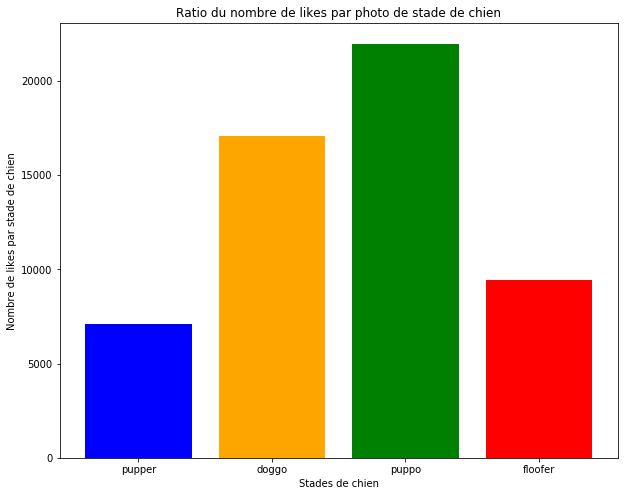

In [64]:
plt.figure(figsize=(10, 8))
locations = [1, 2, 3, 4]
colors = ["blue", "orange", "green", "red"]
plt.bar(locations, nb_favs_per_stade, tick_label=nb_favs_per_stade.index, color=colors)
plt.xlabel("Stades de chien")
plt.ylabel("Nombre de likes par stade de chien")
plt.title("Ratio du nombre de likes par photo de stade de chien")
plt.show()